### Test copulas

In [1]:
import pandas as pd 
from copulas.visualization import scatter_2d

df_ow = pd.read_csv("scenario_data/windoffshore.csv")

# Only 2019
df_ow = df_ow.iloc[-8760:]
df_ow = df_ow.drop(columns=["time"])
df_ow

BE      DE      DK      FI      FR      GB      IE      NL      NO  \
35064  0.3313  0.8879  0.9132  0.6748  0.1069  0.5602  0.2010  0.5815  0.8490   
35065  0.3661  0.9009  0.9325  0.6279  0.1138  0.5699  0.1853  0.6078  0.8252   
35066  0.3812  0.9178  0.9441  0.5358  0.1039  0.5606  0.1643  0.6329  0.8057   
35067  0.3790  0.9177  0.9613  0.4160  0.0916  0.5571  0.1662  0.7024  0.6724   
35068  0.3928  0.9260  0.9708  0.2904  0.0703  0.5313  0.1853  0.7250  0.5767   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
43819  0.3553  0.0627  0.3277  0.6192  0.4522  0.3507  0.0428  0.0735  0.5534   
43820  0.3692  0.0493  0.2974  0.6115  0.4493  0.3581  0.0845  0.0794  0.6203   
43821  0.3326  0.0437  0.3009  0.5861  0.4829  0.3483  0.1077  0.0859  0.6819   
43822  0.2794  0.0495  0.3397  0.5549  0.5207  0.3278  0.0969  0.0933  0.7540   
43823  0.2445  0.0678  0.3788  0.5178  0.5691  0.2858  0.0626  0.1020  0.7949   

           SE  ...       VVC       VVD      SRVF      SRVB      NAVB  \
35064  0.9827  ...  0.999870  0.999813  0.999813  0.999809  0.946160   
35065  0.9580  ...  0.567413  0.999910  0.999813  0.999813  0.777507   
35066  0.9271  ...  0.000000  0.999910  0.999813  0.999813  0.633908   
35067  0.8647  ...  0.348609  0.000000  0.999813  0.999813  0.624306   
35068  0.8925  ...  0.999986  0.614023  0.999813  0.999813  0.722618   
...       ...  ...       ...       ...       ...       ...       ...   
43819  0.6067  ...  0.994421  0.873503  0.215321  0.247384  0.515774   
43820  0.5490  ...  0.999776  0.824044  0.263830  0.270437  0.444876   
43821  0.5024  ...  0.999768  0.863697  0.276728  0.373095  0.397604   
43822  0.5183  ...  0.999769  0.978837  0.267222  0.571758  0.397051   
43823  0.5649  ...  0.999774  0.861791  0.338976  0.829214  0.457943   

           NAVA      NAVD      NAVC       VVE      SRVD  
35064  0.828404  0.999809  0.999813  0.999813  0.999813  
35065  0.871765  0.999813  0.999813  0.999813  0.999813  
35066  0.778623  0.999813  0.999809  0.999895  0.999809  
35067  0.608736  0.999813  0.999809  0.999910  0.999813  
35068  0.526314  0.999812  0.999809  0.999813  0.999813  
...         ...       ...       ...       ...       ...  
43819  0.788339  0.318274  0.000000  0.595597  0.124753  
43820  0.810298  0.268048  0.000749  0.595842  0.140528  
43821  0.766816  0.229016  0.002564  0.554006  0.203281  
43822  0.692031  0.213431  0.000666  0.789336  0.319079  
43823  0.999775  0.207185  0.004055  0.987218  0.402116  

[8760 rows x 41 columns]

<AxesSubplot:ylabel='Frequency'>

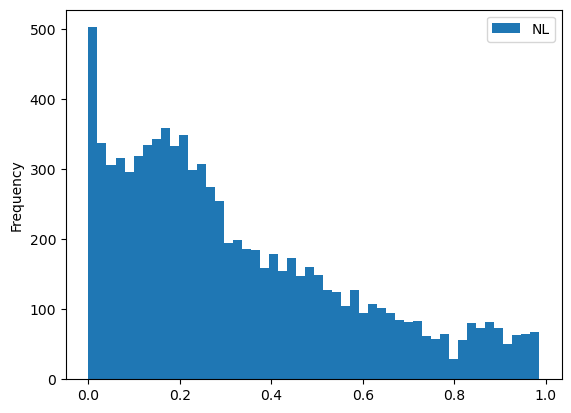

In [9]:
# Histograms
OWP = "NL"

df_ow[[OWP]].plot.hist(bins=50)

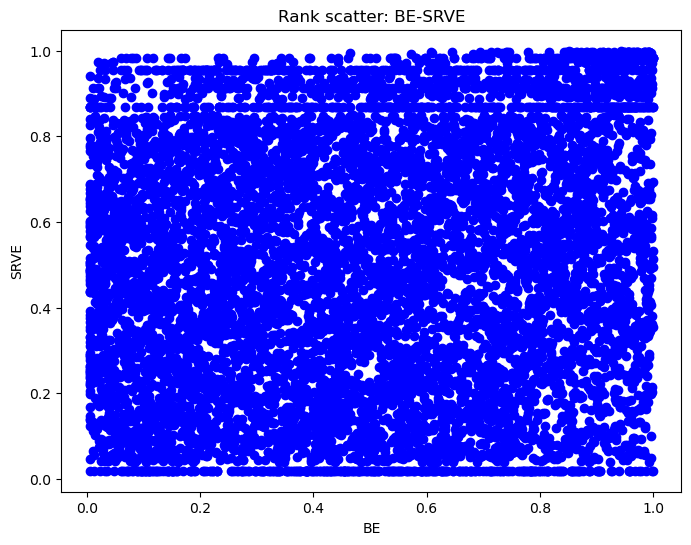

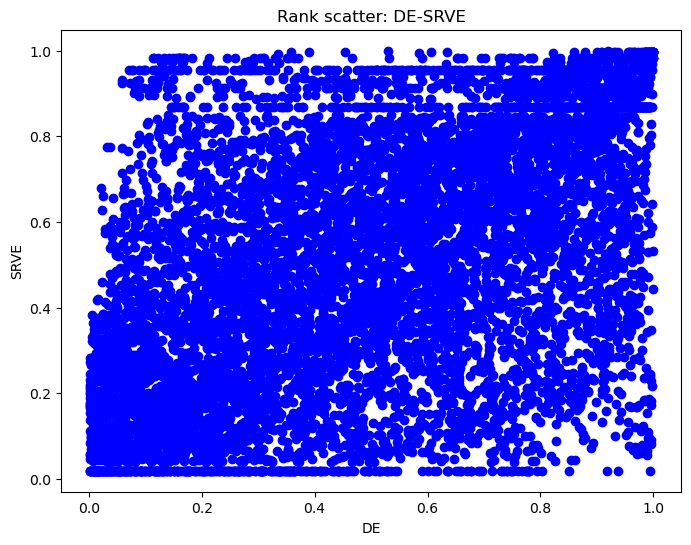

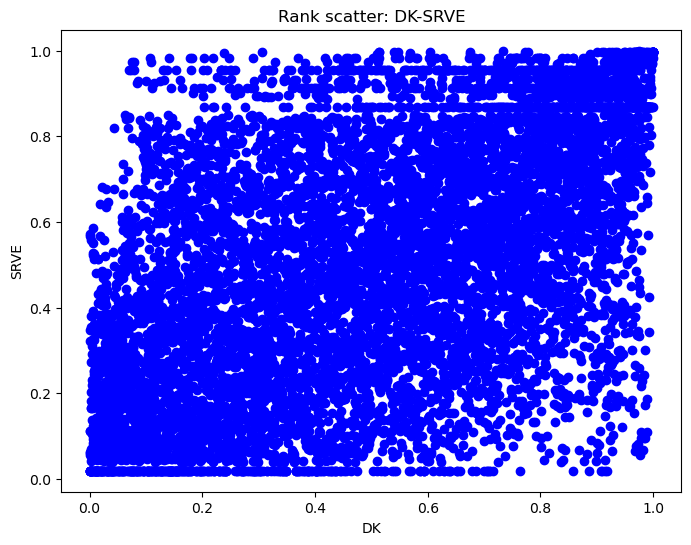

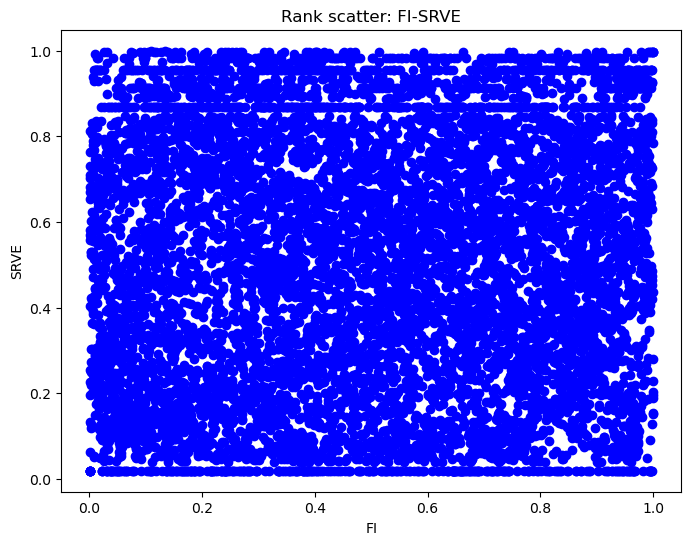

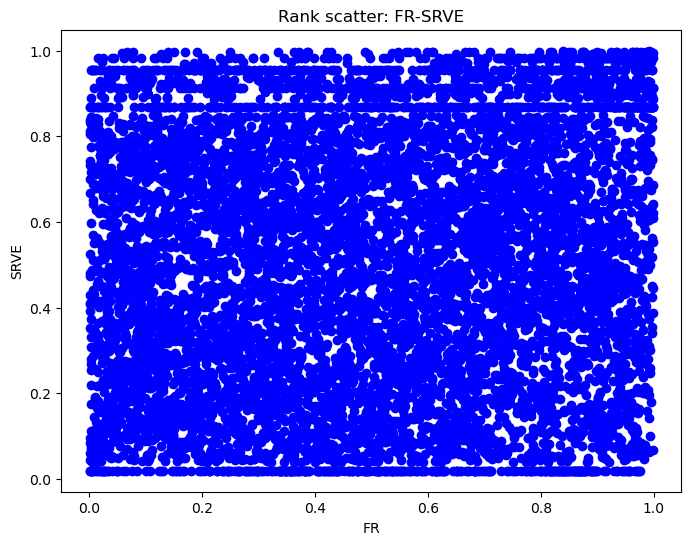

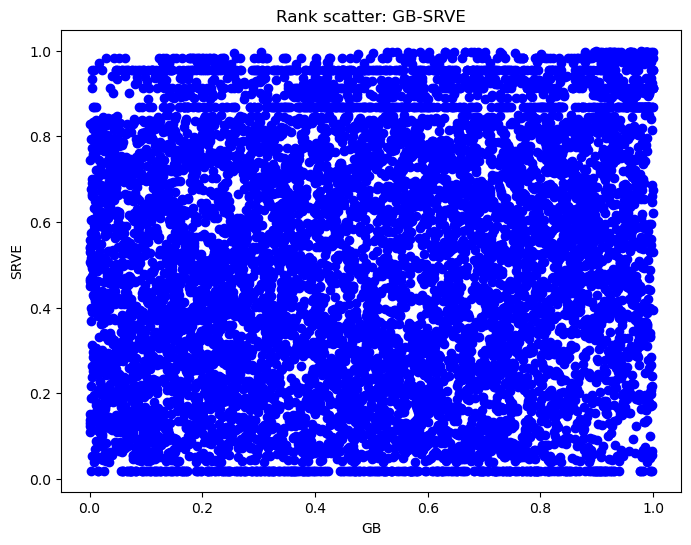

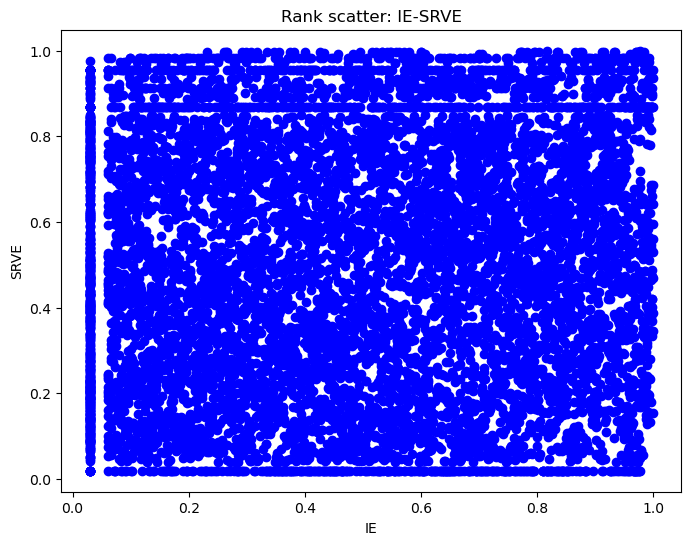

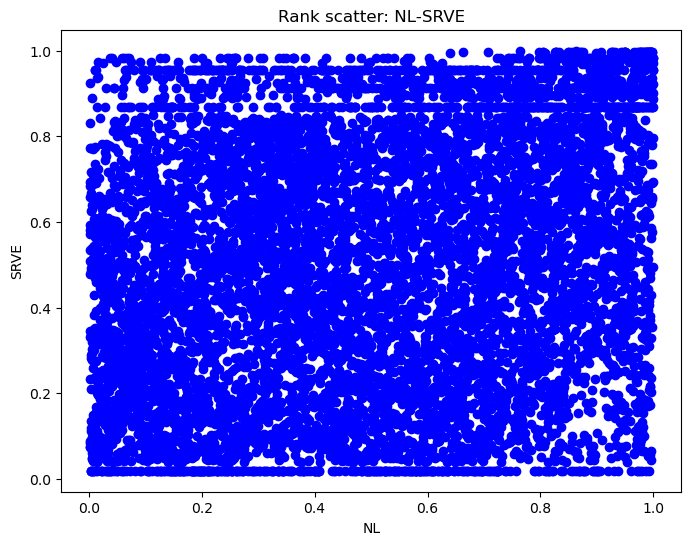

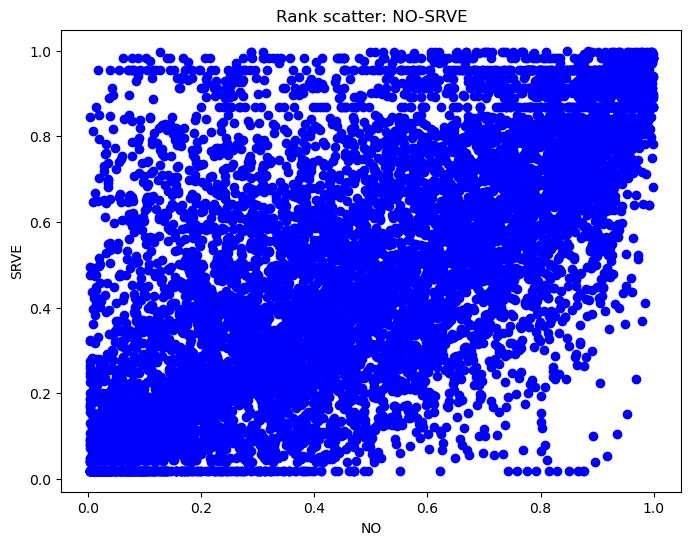

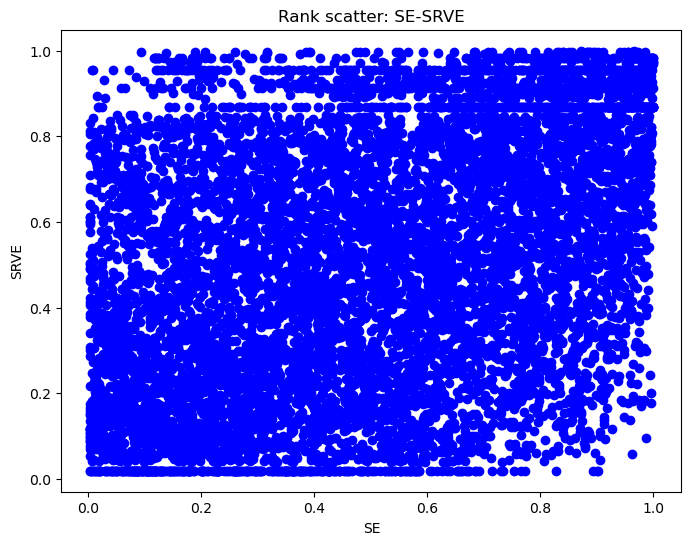

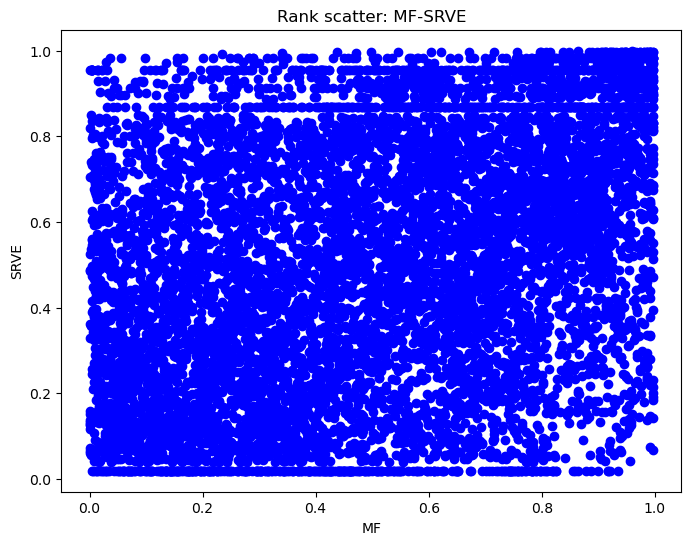

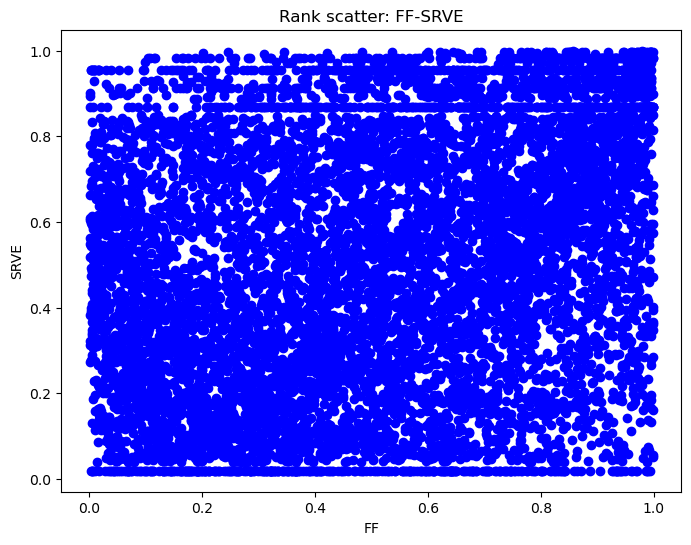

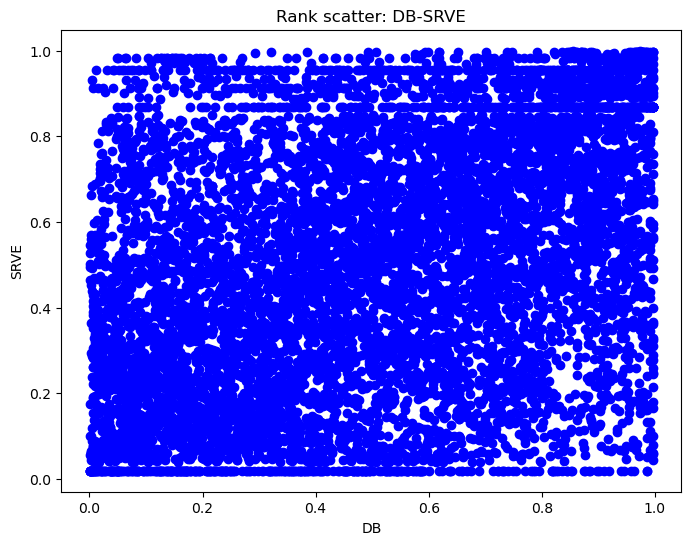

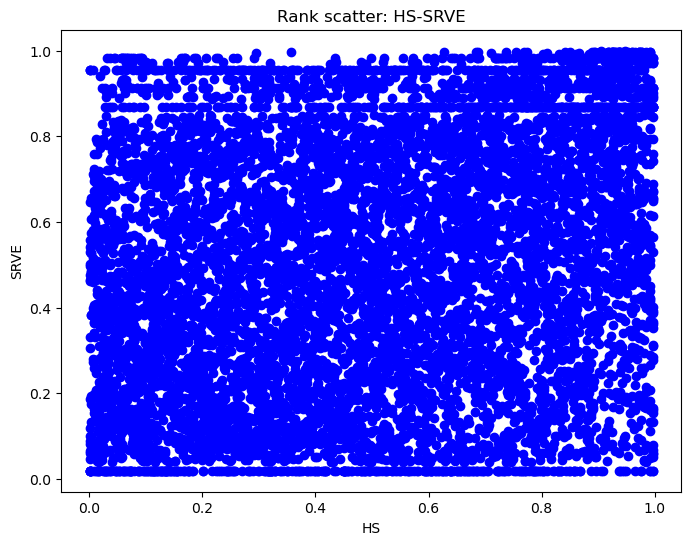

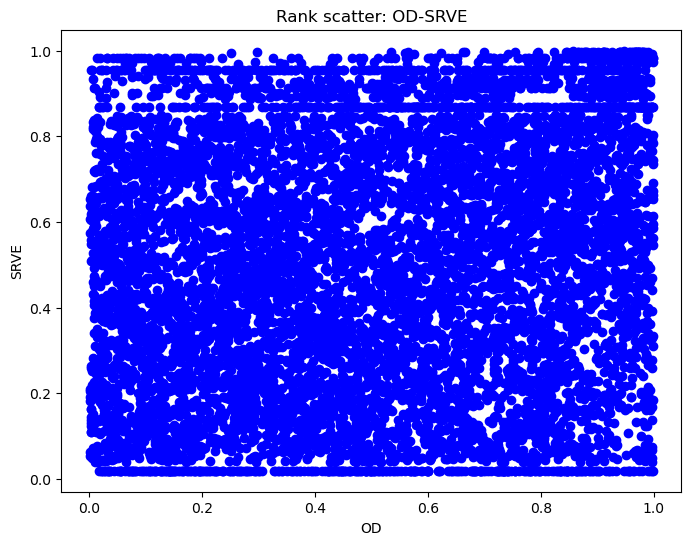

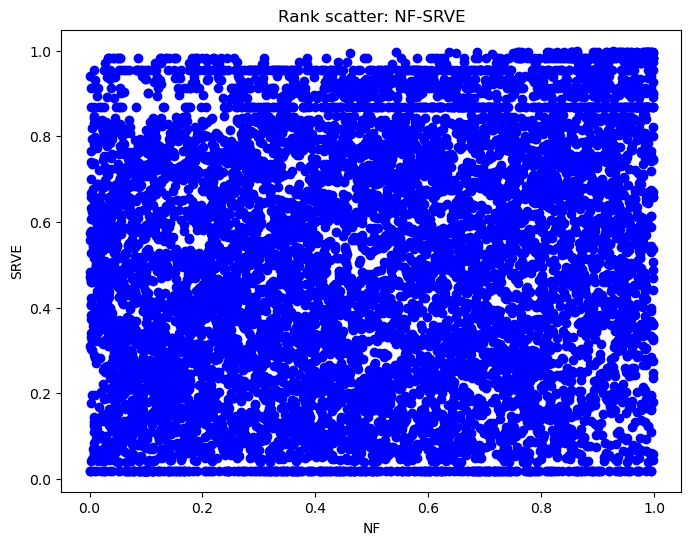

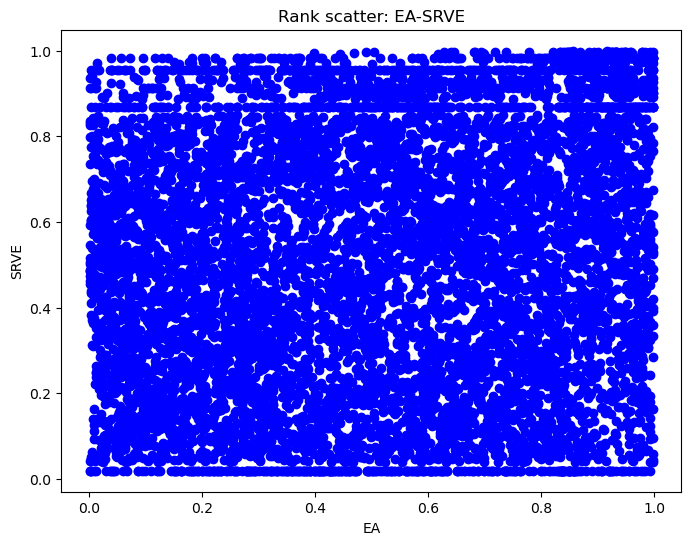

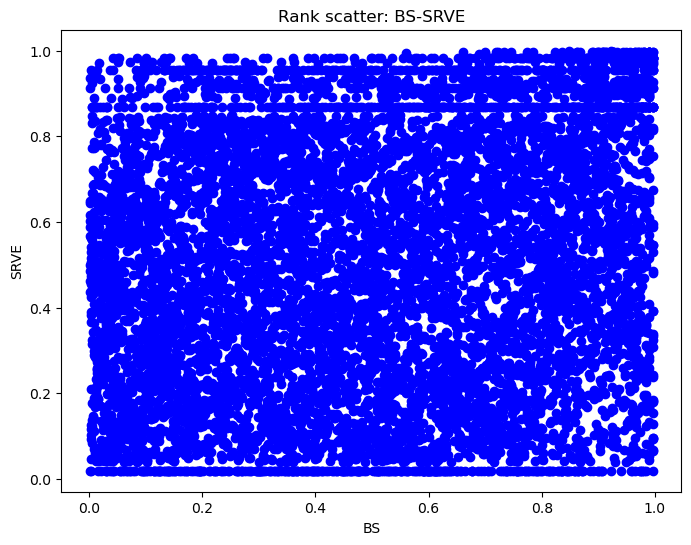

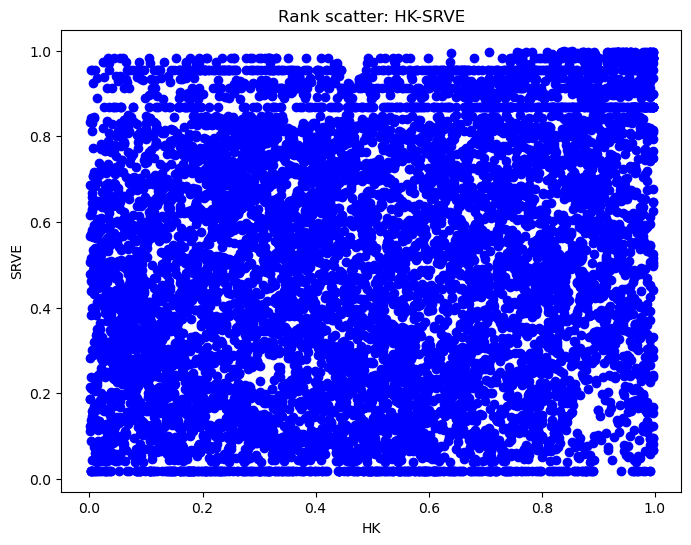

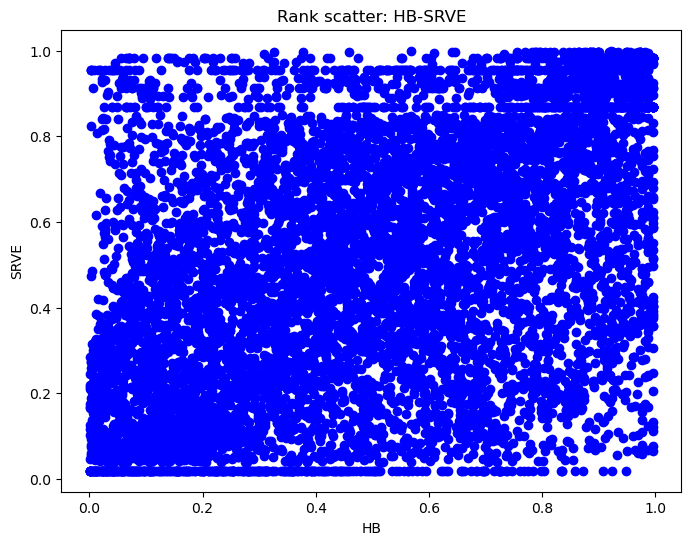

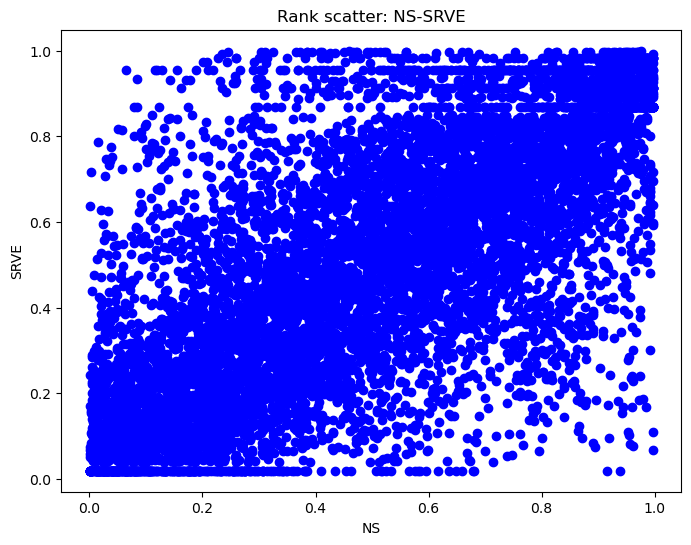

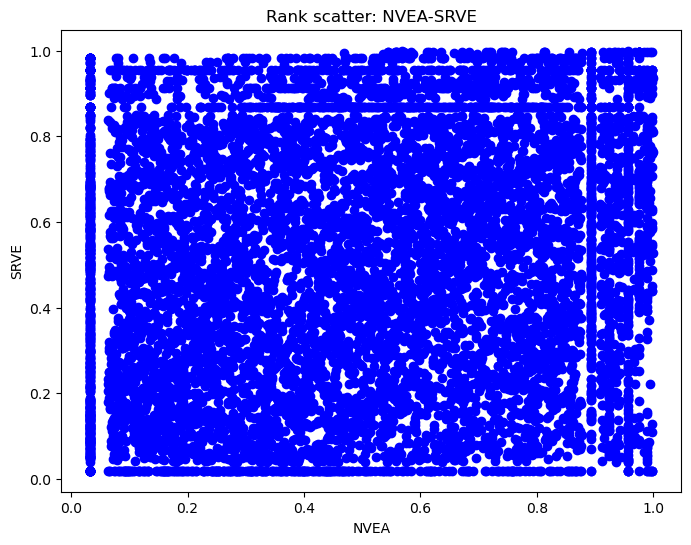

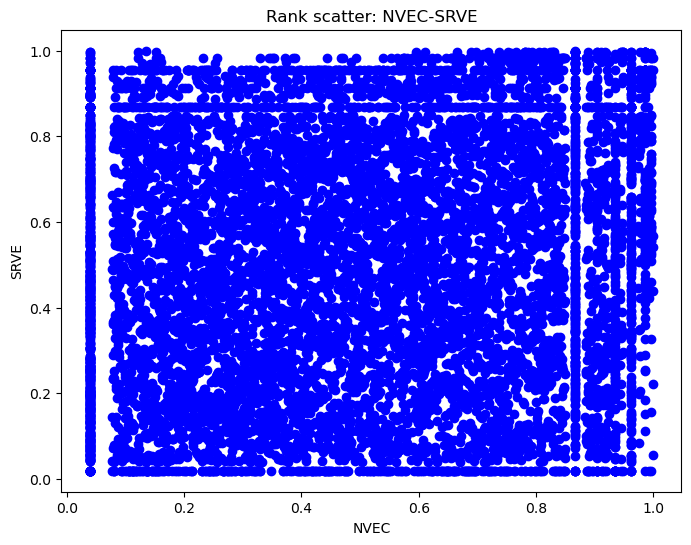

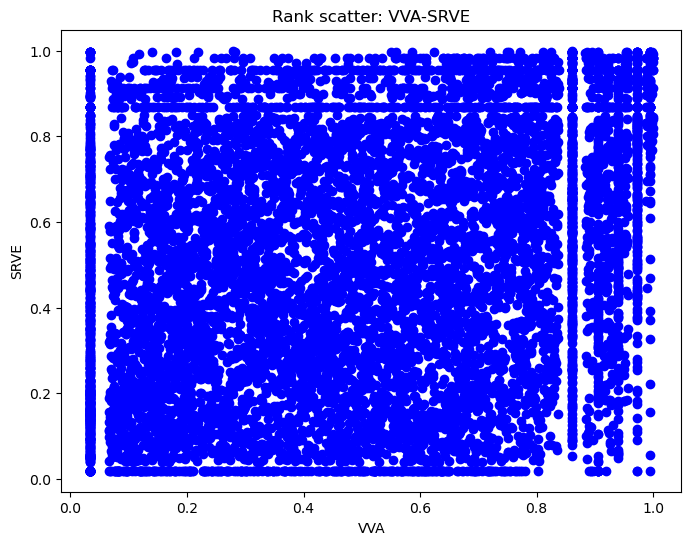

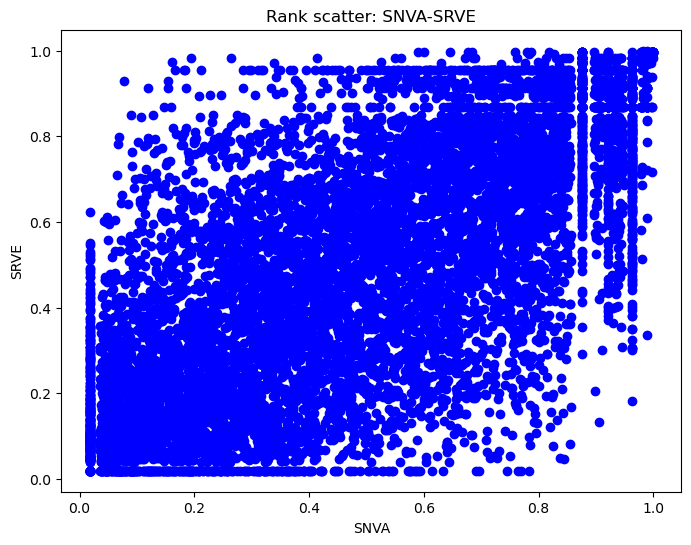

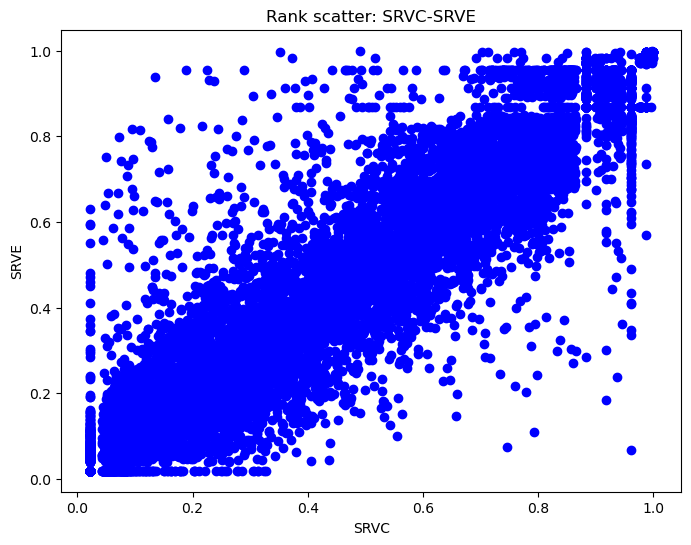

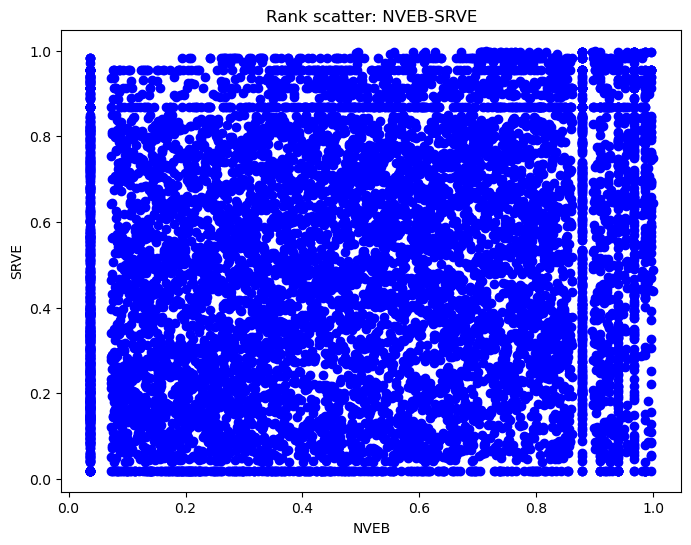

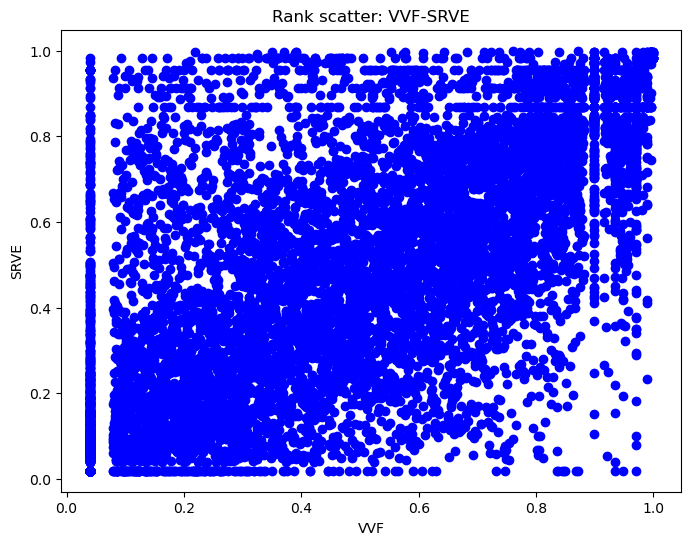

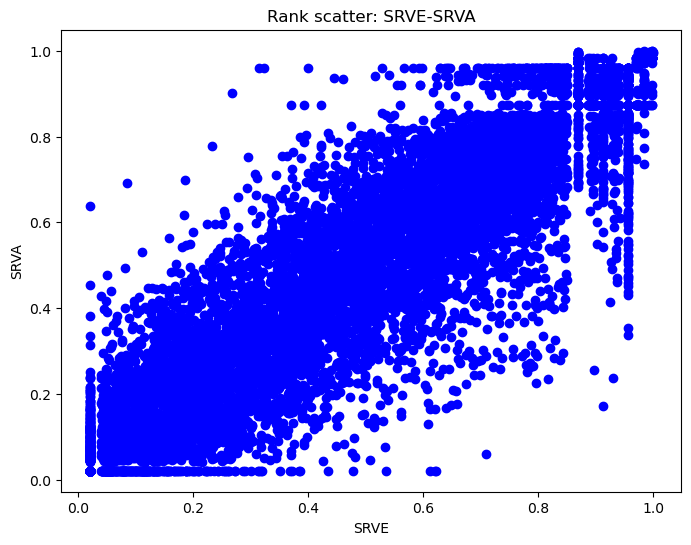

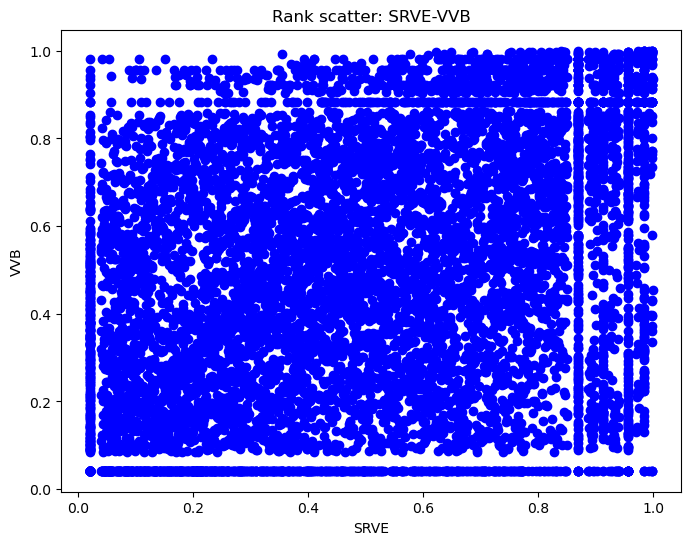

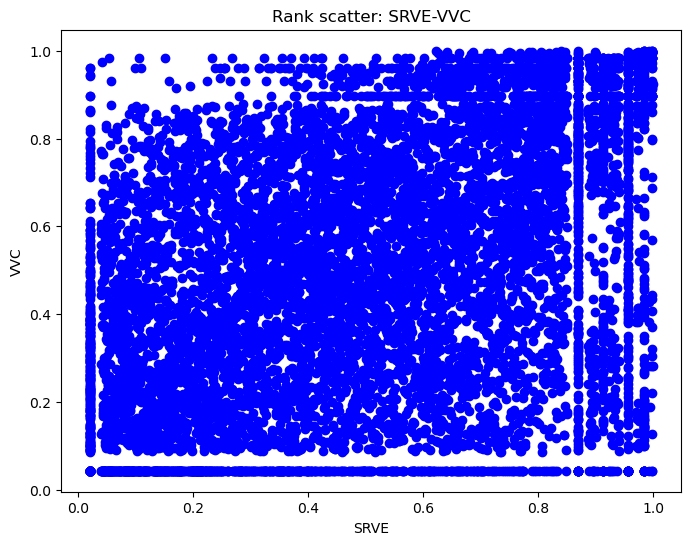

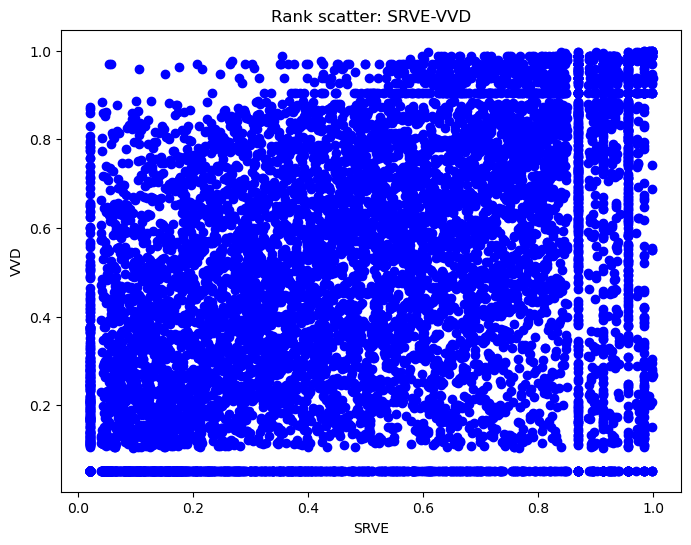

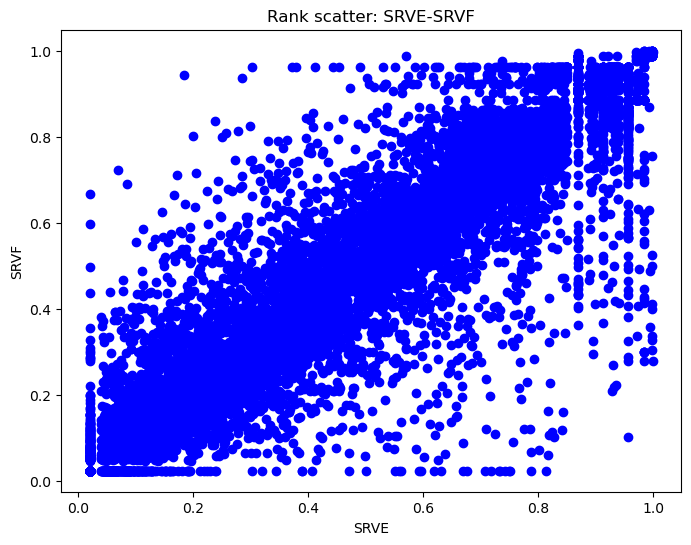

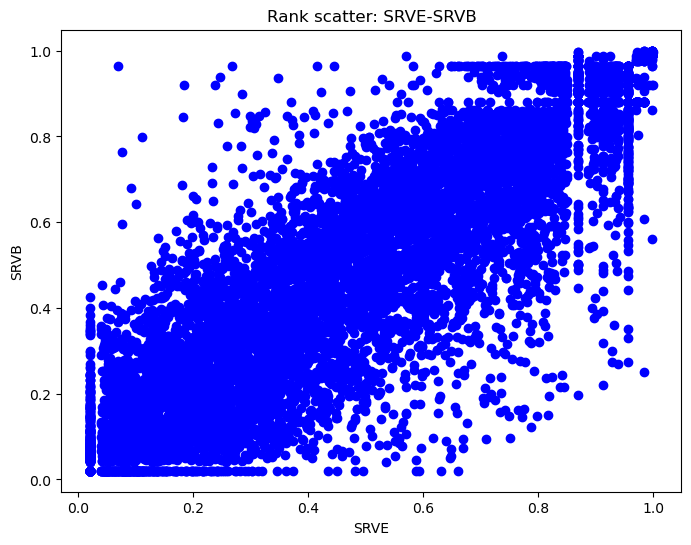

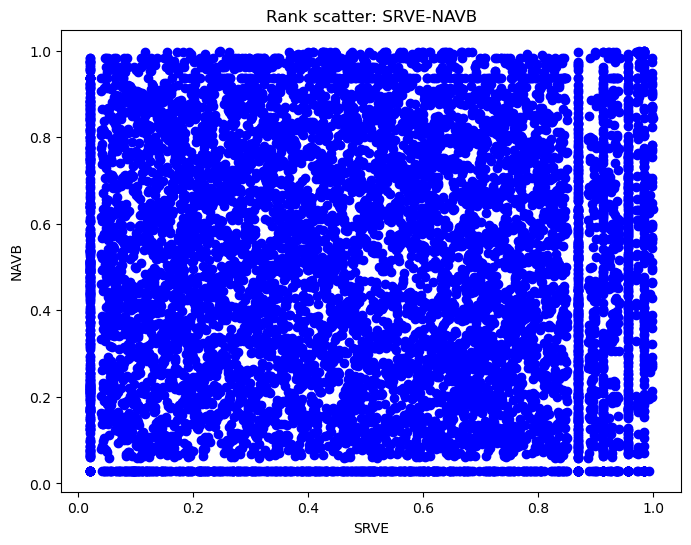

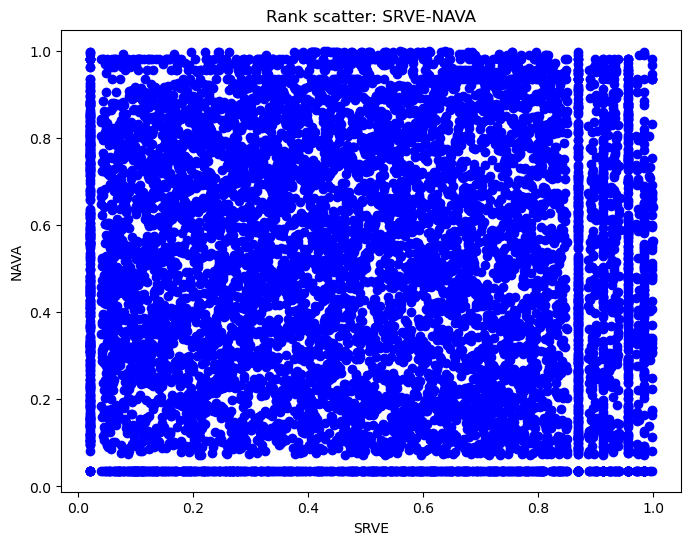

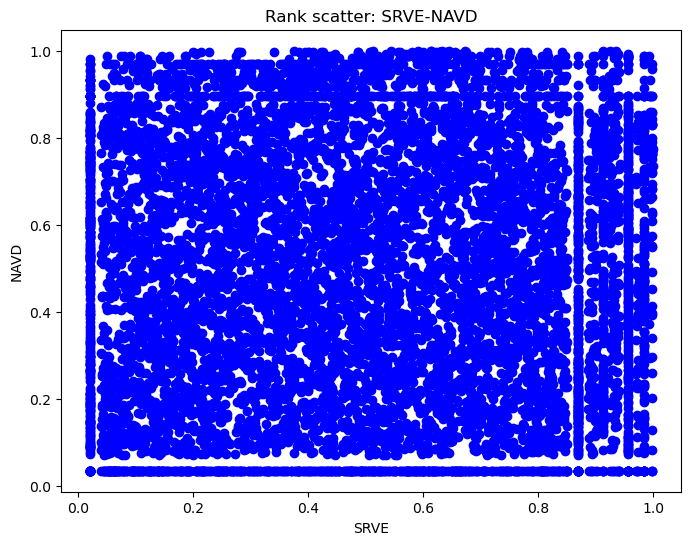

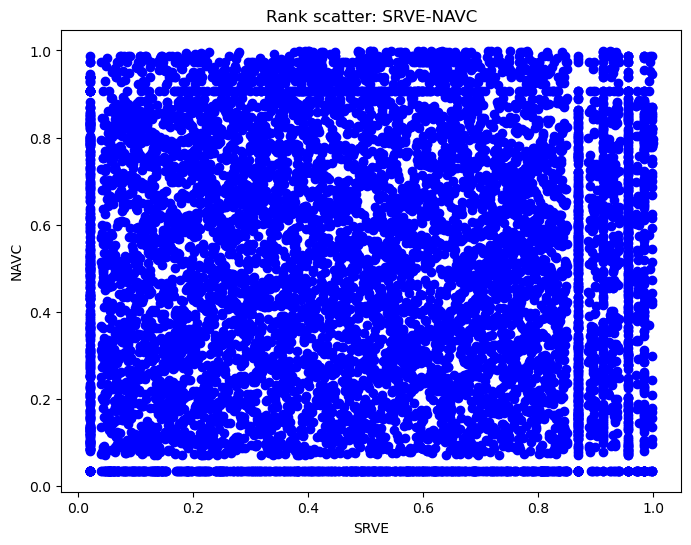

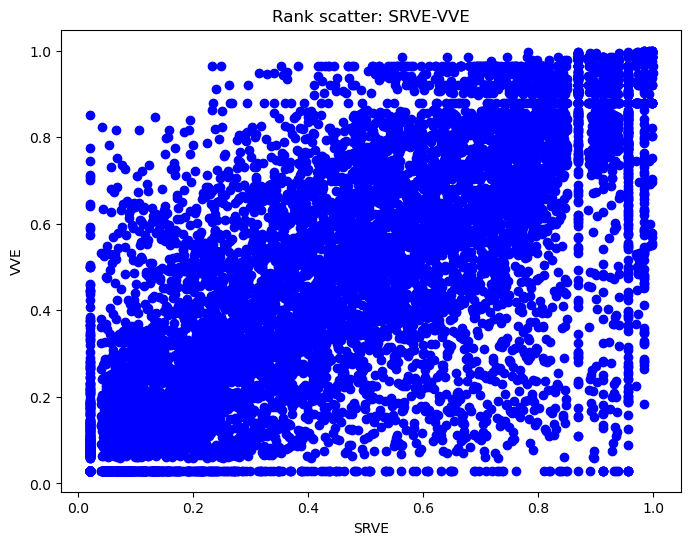

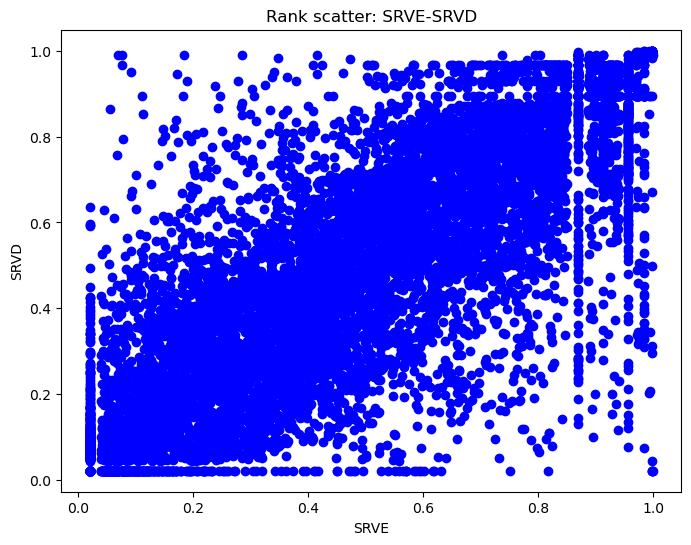

Index(['BE', 'DE', 'DK', 'FI', 'FR', 'GB', 'IE', 'NL', 'NO', 'SE', 'MF', 'FF',
       'DB', 'HS', 'OD', 'NF', 'EA', 'BS', 'HK', 'HB', 'NS', 'NVEA', 'NVEC',
       'VVA', 'SNVA', 'SRVC', 'NVEB', 'VVF', 'SRVE', 'SRVA', 'VVB', 'VVC',
       'VVD', 'SRVF', 'SRVB', 'NAVB', 'NAVA', 'NAVD', 'NAVC', 'VVE', 'SRVD'],
      dtype='object')


In [11]:
import numpy as np
import matplotlib.pyplot as plt

ALL = False # Show all plots (many!!)
OWP = "SRVE" # Show all combinations between single OWP (~40 plots)

cols = df_ow.columns

copulas = dict({})

for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        _OWP1 = cols[i]
        _OWP2 = cols[j]

        df_copula = pd.DataFrame()
        df_x = df_ow[[_OWP1]].rank() / len(df_ow[[_OWP1]])
        df_y = df_ow[[_OWP2]].rank() / len(df_ow[[_OWP2]])
        df_copula["x"] = df_x
        df_copula["y"] = df_y

        if ALL == True or (OWP == _OWP1 or OWP == _OWP2):
            plt.figure(figsize=(8,6))
            plt.scatter(df_x, df_y, color="blue")
            plt.xlabel(_OWP1)
            plt.ylabel(_OWP2)
            plt.title(f"Rank scatter: {_OWP1}-{_OWP2}")
            plt.show()

        """ xy = sorted([_OWP1, _OWP2])
        key = f"{xy[0]}-{xy[1]}"
        copulas[key] = dict({"df": df_copula, "x": _OWP1, "y": _OWP2}) """

print(cols)

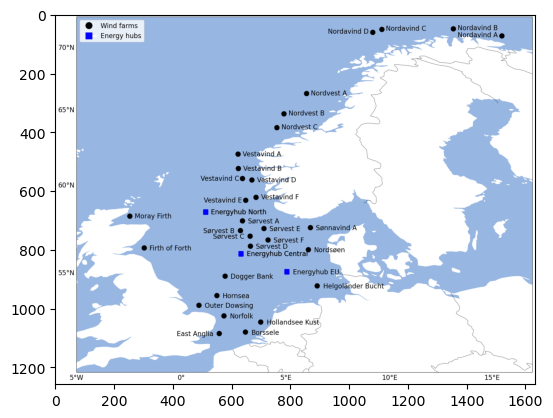

In [62]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('offshore_locations.png')
imgplot = plt.imshow(img)
plt.show()

In [65]:
OWP1 = "NAVA"
OWP2 = "SRVB"

xy = sorted([OWP1, OWP2])
key = f"{xy[0]}-{xy[1]}"

_df = copulas[key]["df"]
_x = copulas[key]["x"]
_y = copulas[key]["y"]

scatter_2d(_df, title=f"x={_x}, y={_y}")